<a href="https://colab.research.google.com/github/ma06nicole/hs/blob/master/hs_model_specific_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
with open('/content/drive/My Drive/hs_df_final.csv', 'rb') as fp:
  df_final = pickle.load(fp)

In [ ]:
df_final['tweet'] = df_final['tweet'].str.lower()
df_final.head

<bound method NDFrame.head of                                                    tweet group
0                  #sissy faggot https://t.co/bm1nk8hcyo   0.0
1      big dyke energy right there https://t.co/nrepg...   0.0
2       @lokohobo1 no u   faggot https://t.co/r7yml0vepj   0.0
3      faggot in chastity like it should be 24/7! htt...   0.0
4      @rockwelsrevenge @ayoariberry i imagine it’s t...   0.0
...                                                  ...   ...
65929  actually this eldritch mass are harmful! they ...   4.0
65930  actually this weird hoi polloi are harmful! th...   4.0
65931  abu district attorney atomic number 83 aba du ...   4.0
65932  abu da bi aba du ba ba hamud! see? i ’ m an ar...   4.0
65933  abu da bismuth aba du ba ba hamud! see? i ’ m ...   4.0

[65934 rows x 2 columns]>

In [ ]:
import re

def remove_usernames_links(tweet):
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('http[^\s]+','',tweet)
    return tweet
df_final['tweet'] = df_final['tweet'].apply(remove_usernames_links)
df_final.head

<bound method NDFrame.head of                                                    tweet group
0                                         #sissy faggot    0.0
1                           big dyke energy right there    0.0
2                                         no u   faggot    0.0
3            faggot in chastity like it should be 24/7!    0.0
4        i imagine it’s the same way he rationalizes ...   0.0
...                                                  ...   ...
65929  actually this eldritch mass are harmful! they ...   4.0
65930  actually this weird hoi polloi are harmful! th...   4.0
65931  abu district attorney atomic number 83 aba du ...   4.0
65932  abu da bi aba du ba ba hamud! see? i ’ m an ar...   4.0
65933  abu da bismuth aba du ba ba hamud! see? i ’ m ...   4.0

[65934 rows x 2 columns]>

In [ ]:
df_final = df_final.sample(frac=1).reset_index(drop=True)
df_final = df_final[:12000]
df_final.head

<bound method NDFrame.head of                                                    tweet group
0      @ whitemanswhole exclude upward faggot  / / t....   0.0
1                                             no nigger    3.0
2      dear katarzyna i ’ m sorry for calling you a f...   2.0
3      you a faggot? look what 1 have for you! .. .. ...   0.0
4                      know want aver nigger hulk. @ url   4.0
...                                                  ...   ...
11995          called country parents birth shithole sh    4.0
11996   diversity general eurafrica particular (((the...   4.0
11997  this why i always keep a fat nigga in my squad 💯    3.0
11998               it's complete    #griselda nigga 🤙🏾    3.0
11999                              he said cunt 🤣🤣🤣😭😭😭😱    2.0

[12000 rows x 2 columns]>

In [ ]:
with open('/content/drive/My Drive/tokenizer.json', 'rb') as fp:
  tokenizer = pickle.load(fp)
word_index = tokenizer.word_index

In [ ]:
!pip install tensorflow_addons

In [ ]:
with open('/content/drive/My Drive/text_embedding.json', 'rb') as fp:
  text_embedding = pickle.load(fp)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, LSTM, Embedding,Dropout,SpatialDropout1D,Conv1D,MaxPooling1D,GRU,BatchNormalization, Activation
from tensorflow.keras.layers import Input,Bidirectional,GlobalAveragePooling1D,GlobalMaxPooling1D,concatenate,LeakyReLU
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
import tensorflow_addons as tfa

MAX_SEQUENCE_LENGTH = 5000
filters = 5
kernel_size = 3
lstm_units = 300

model = Sequential()
model.add(
Embedding(input_dim=text_embedding.shape[0],
output_dim=text_embedding.shape[1],
weights=[text_embedding],
input_length=MAX_SEQUENCE_LENGTH,
trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters, kernel_size=kernel_size,kernel_regularizer=regularizers.l2(0.00001), padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(lstm_units,dropout=0.2, recurrent_dropout=0.2,return_sequences=True)))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters, kernel_size=kernel_size,kernel_regularizer=regularizers.l2(0.00001), padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(lstm_units,dropout=0.2, recurrent_dropout=0.2,return_sequences=True)))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters, kernel_size=kernel_size,kernel_regularizer=regularizers.l2(0.00001), padding='same'))
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(lstm_units,dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy' , tf.keras.metrics.AUC(), tfa.metrics.F1Score(5)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 96)          4094304   
                                                                 
 spatial_dropout1d (SpatialD  (None, 5000, 96)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 5000, 5)           1445      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 5000, 5)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2500, 5)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 2500, 600)        7

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
categorical_labels = to_categorical(list(df_final["group"]),num_classes=5)
X_train, X_test, Y_train, Y_test = train_test_split(list(df_final["tweet"]), categorical_labels, test_size=0.2)

In [ ]:
history = model.fit(pad_sequences(tokenizer.texts_to_sequences(X_train),maxlen=MAX_SEQUENCE_LENGTH),Y_train,batch_size=128,epochs=13,
validation_data=(pad_sequences(tokenizer.texts_to_sequences(X_test),maxlen=MAX_SEQUENCE_LENGTH),Y_test),shuffle=True)

Epoch 1/13
75/75 [==============================] - 3615s 48s/step - loss: 1.5580 - accuracy: 0.3014 - auc: 0.5993 - f1_score: 0.1519 - val_loss: 1.4320 - val_accuracy: 0.3883 - val_auc: 0.7092 - val_f1_score: 0.2336
Epoch 2/13
75/75 [==============================] - 3798s 51s/step - loss: 1.4187 - accuracy: 0.3534 - auc: 0.7139 - f1_score: 0.2552 - val_loss: 1.3621 - val_accuracy: 0.3725 - val_auc: 0.7405 - val_f1_score: 0.2989
Epoch 3/13
75/75 [==============================] - 3879s 52s/step - loss: 1.3288 - accuracy: 0.3798 - auc: 0.7561 - f1_score: 0.3403 - val_loss: 1.2574 - val_accuracy: 0.4258 - val_auc: 0.7868 - val_f1_score: 0.3549
Epoch 4/13
75/75 [==============================] - 3907s 52s/step - loss: 1.2711 - accuracy: 0.4090 - auc: 0.7804 - f1_score: 0.3835 - val_loss: 1.1596 - val_accuracy: 0.4804 - val_auc: 0.8226 - val_f1_score: 0.3653
Epoch 5/13
75/75 [==============================] - 3942s 53s/step - loss: 1.2194 - accuracy: 0.4354 - auc: 0.8002 - f1_score: 0.418

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'auc', 'f1_score', 'val_loss', 'val_accuracy', 'val_auc', 'val_f1_score'])

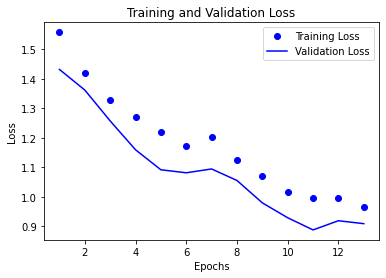

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

auc = history_dict['auc']
val_auc = history_dict['val_auc']

f1_score = history_dict['f1_score']
val_f1_score = history_dict['val_f1_score']



epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

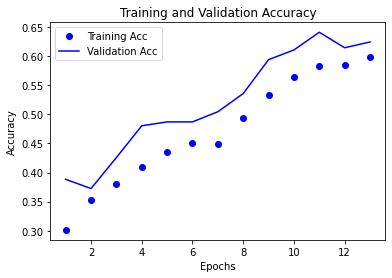

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

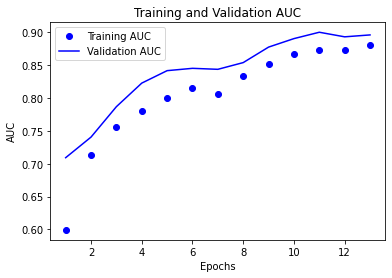

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, auc, 'bo', label='Training AUC')
plt.plot(epochs, val_auc, 'b', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

plt.show()

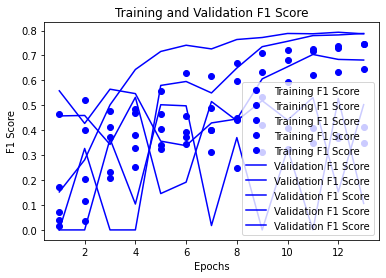

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, f1_score, 'bo', label='Training F1 Score')
plt.plot(epochs, val_f1_score, 'b', label='Validation F1 Score')
plt.title('Training and Validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.show()

## saving model

In [ ]:
model.save("/content/drive/My Drive/hs_final_models/hs_model_specific_final")

INFO:tensorflow:Assets written to: /content/drive/My Drive/hs_final_models/hs_model_specific_final/assets
